In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Data

In [2]:
train = pd.read_csv('data/train_clean.csv', dtype={'time': np.float32, 'signal': np.float32, 'open_channels':np.int32})
test  = pd.read_csv('data/test_clean.csv',  dtype={'time': np.float32, 'signal': np.float32})
sub   = pd.read_csv('data/sample_submission.csv', dtype={'time': np.float32})

In [3]:
tr0 = train[      0: 500000]
tr1 = train[ 500000:1000000]
tr2 = train[1000000:1500000]
tr3 = train[1500000:2000000]
tr4 = train[2000000:2500000]
tr5 = train[2500000:3000000]
tr6 = train[3000000:3500000]
tr7 = train[3500000:4000000]
tr8 = train[4000000:4500000]
tr9 = train[4500000:5000000]

te0 = test[      0: 500000]
te1 = test[ 500000:1000000]
te2 = test[1000000:1500000]
te3 = test[1500000:2000000]

assert(len(train) == len(tr0)+len(tr1)+len(tr2)+len(tr3)+len(tr4)+len(tr5)+len(tr6)+len(tr7)+len(tr8)+len(tr9))
assert(len(test)  == len(te0)+len(te1)+len(te2)+len(te3))

# Whole Scalogram

In [4]:
%%time

feats = 30
scalogram30_train = signal.cwt(data=train["signal"].values, wavelet=signal.ricker, widths=np.arange(1, feats+1))

CPU times: user 21.2 s, sys: 453 ms, total: 21.7 s
Wall time: 21.7 s


In [5]:
%%time
scalogram30_test = signal.cwt(data=test["signal"].values, wavelet=signal.ricker, widths=np.arange(1, feats+1))

CPU times: user 8.52 s, sys: 110 ms, total: 8.63 s
Wall time: 8.64 s


In [6]:
scalogram30_train = scalogram30_train
scalogram30_test  = scalogram30_test

scalogram30_train.shape, scalogram30_test.shape

((30, 5000000), (30, 2000000))

In [9]:
np.save('data/scalogram30_train.npy', scalogram30_train.transpose())
np.save('data/scalogram30_test.npy',  scalogram30_test.transpose())

In [10]:
np.save('data/train_y.npy', train["open_channels"].values)

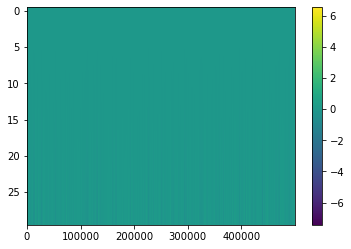

In [14]:
plt.imshow(scalogram30_train[:,1000000:1500000], aspect='auto'); plt.colorbar();

# Scalogram per batches

In [6]:
%%time
tr0_scalogram30 = signal.cwt(data=tr0["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr1_scalogram30 = signal.cwt(data=tr1["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr2_scalogram30 = signal.cwt(data=tr2["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr3_scalogram30 = signal.cwt(data=tr3["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr4_scalogram30 = signal.cwt(data=tr4["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr5_scalogram30 = signal.cwt(data=tr5["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr6_scalogram30 = signal.cwt(data=tr6["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr7_scalogram30 = signal.cwt(data=tr7["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr8_scalogram30 = signal.cwt(data=tr8["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
tr9_scalogram30 = signal.cwt(data=tr9["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))

CPU times: user 19.9 s, sys: 323 ms, total: 20.2 s
Wall time: 20.2 s


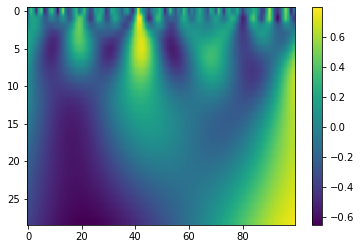

In [19]:
plt.imshow(tr0_scalogram30[:,1000:1100], aspect='auto'); plt.colorbar();

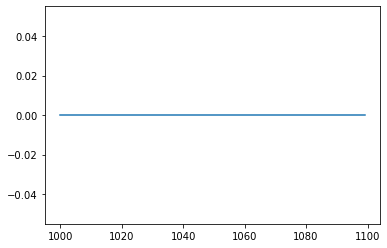

In [18]:
tr0[1000:1100]["open_channels"].plot.line();

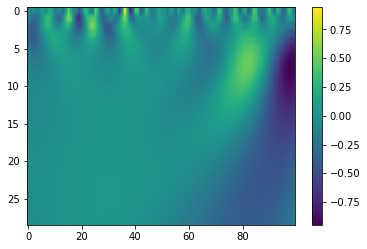

In [20]:
plt.imshow(tr1_scalogram30[:,1000:1100], aspect='auto'); plt.colorbar();

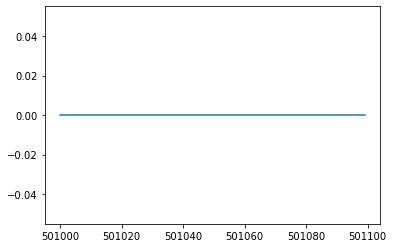

In [21]:
tr1[1000:1100]["open_channels"].plot.line();

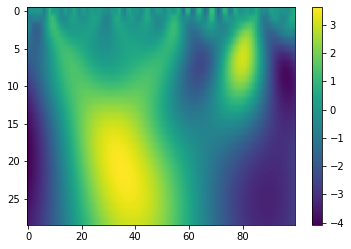

In [25]:
plt.imshow(tr2_scalogram30[:,1000:1100], aspect='auto'); plt.colorbar();

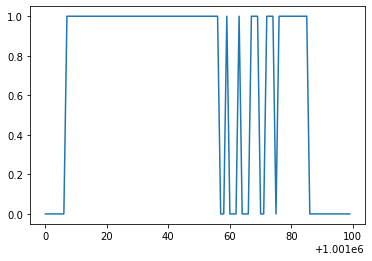

In [23]:
tr2[1000:1100]["open_channels"].plot.line();

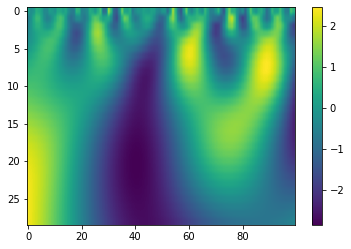

In [26]:
plt.imshow(tr3_scalogram30[:,1000:1100], aspect='auto'); plt.colorbar();

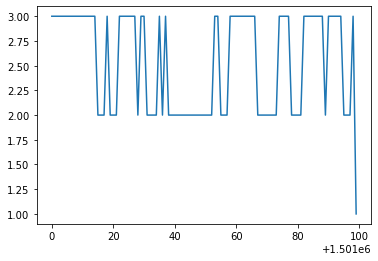

In [27]:
tr3[1000:1100]["open_channels"].plot.line();

In [ ]:
plt.imshow(tr0_scalogram30, aspect='auto');